In [1]:
import pandas as pd

In [78]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
taxi_jan_2023=pd.read_parquet('Data/yellow_tripdata_2023-01.parquet')
taxi_data=pd.concat([taxi_jan_2023])

In [4]:
print(taxi_jan_2023.shape)
taxi_jan_2023.head()

(3066766, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [5]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [6]:
taxi_data=taxi_data[['tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','trip_distance','RatecodeID','PULocationID','DOLocationID','payment_type','total_amount']]

## Data Exploration

In [7]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,161,141,2,14.30
1,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,43,237,1,16.90
2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,48,238,1,34.90
3,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,138,7,1,20.85
4,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,107,79,1,19.68


In [8]:
taxi_data.isnull().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71743
trip_distance                0
RatecodeID               71743
PULocationID                 0
DOLocationID                 0
payment_type                 0
total_amount                 0
dtype: int64

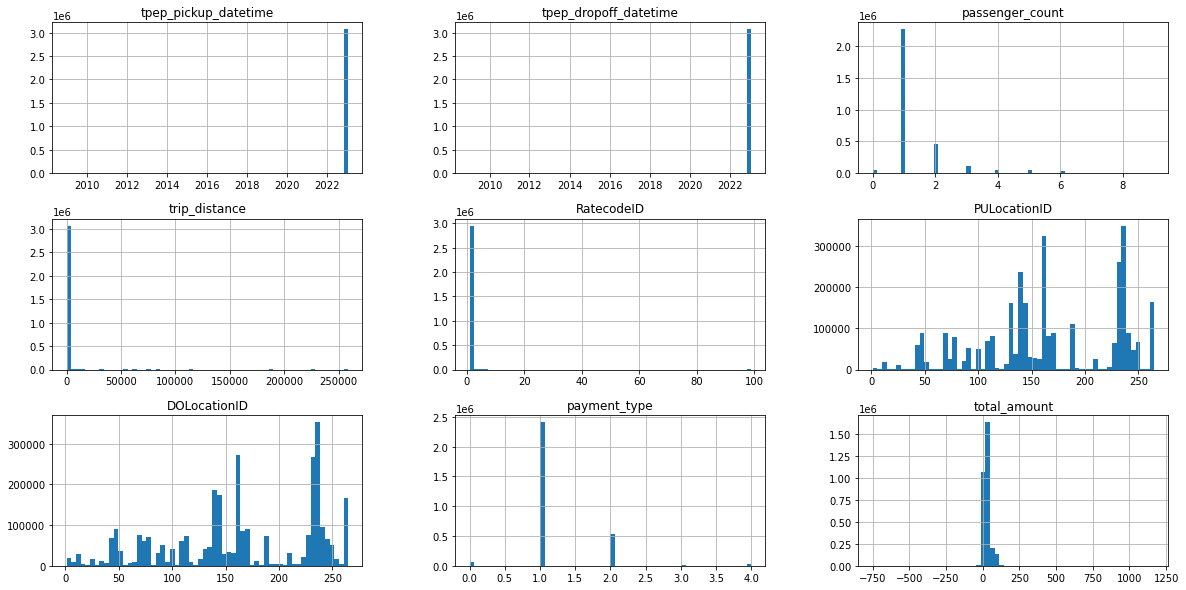

In [9]:
taxi_data.hist(figsize=(20,10),bins=60)
plt.show()

In [10]:
taxi_data['RatecodeID'].value_counts()

1.0     2839305
2.0      114239
5.0       15043
99.0      13106
3.0        8958
4.0        4366
6.0           6
Name: RatecodeID, dtype: int64

<AxesSubplot:xlabel='index', ylabel='total_amount'>

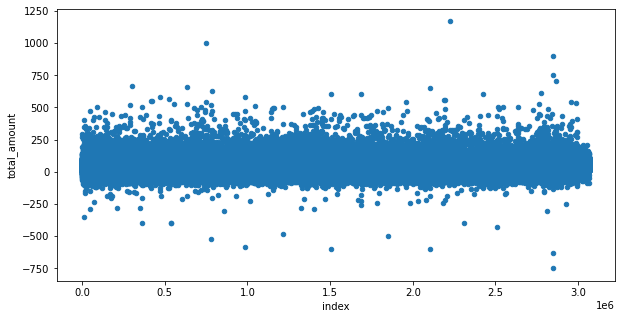

In [11]:
taxi_data.reset_index().plot(kind='scatter',x='index',y='total_amount',figsize=(10,5))

In [12]:
negative_values= taxi_data[taxi_data['total_amount']<0]

tow things to deal with:negative values and high values

In [13]:
print(negative_values.shape)

(25204, 9)


<AxesSubplot:xlabel='index', ylabel='total_amount'>

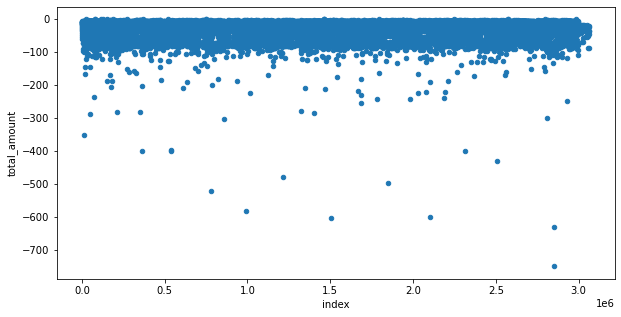

In [14]:
negative_values.reset_index().plot(kind='scatter',x='index',y='total_amount',figsize=(10,5))

In [15]:
negative_values.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
132,2023-01-01 00:28:29,2023-01-01 00:31:03,1.0,0.42,1.0,233,229,4,-10.1
263,2023-01-01 00:20:18,2023-01-01 00:27:56,2.0,1.19,1.0,142,50,4,-14.3
324,2023-01-01 00:52:22,2023-01-01 01:14:03,1.0,4.89,1.0,238,167,4,-30.4
620,2023-01-01 00:06:39,2023-01-01 00:10:02,1.0,0.52,1.0,237,237,2,-10.1
923,2023-01-01 00:34:39,2023-01-01 00:40:25,2.0,0.85,1.0,79,113,4,-12.2


In [16]:
print(taxi_data[taxi_data['total_amount']==0].shape)
taxi_data[taxi_data['total_amount']==0].head()



(568, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3291,2023-01-01 00:11:55,2023-01-01 00:11:55,1.0,0.0,5.0,137,264,2,0.0
23186,2023-01-01 07:23:50,2023-01-01 07:55:05,2.0,10.4,1.0,48,95,3,0.0
61780,2023-01-01 19:16:54,2023-01-01 19:17:15,1.0,0.0,2.0,261,261,3,0.0
61846,2023-01-01 19:24:33,2023-01-01 19:25:27,1.0,0.1,1.0,116,116,4,0.0
78670,2023-01-02 07:11:13,2023-01-02 07:12:11,1.0,0.0,1.0,48,48,4,0.0


In [17]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

1    227
2    128
4    123
3     84
0      6
Name: payment_type, dtype: int64

In [18]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

0.00     450
0.10      21
0.70       8
0.80       7
0.30       7
0.20       5
0.50       5
0.40       4
1.00       4
2.70       4
1.20       4
1.10       4
1.40       3
3.50       2
2.20       2
1.50       2
1.30       2
20.80      2
2.80       2
2.30       2
0.60       2
12.00      2
4.50       1
2.10       1
8.80       1
14.00      1
18.80      1
3.10       1
0.67       1
6.80       1
14.90      1
3.80       1
1.60       1
18.90      1
5.50       1
10.40      1
15.90      1
17.60      1
4.30       1
18.10      1
8.10       1
3.40       1
7.10       1
0.01       1
6.00       1
1.80       1
Name: trip_distance, dtype: int64

In [19]:
taxi_data[taxi_data['total_amount']>200].shape

(1736, 9)

In [20]:
taxi_data['total_amount'].mean()

27.02038310708492

## Data Cleaning

In [21]:
#taxi_data.drop(taxi_data(taxi_data['total_amount']>200),inplace=True)
#taxi_data.drop(taxi_data[taxi_data['total_amount']<=0],inplace=True)

In [22]:
taxi_data_filterd=taxi_data[(taxi_data['total_amount']>=0) & (taxi_data['total_amount']<200)]

In [23]:
print(taxi_data.shape)
taxi_data_filterd.shape

(3066766, 9)


(3039817, 9)

In [24]:
taxi_data_filterd.isna().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71694
trip_distance                0
RatecodeID               71694
PULocationID                 0
DOLocationID                 0
payment_type                 0
total_amount                 0
dtype: int64

In [25]:
taxi_data_filterd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3039817 entries, 0 to 3066765
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   passenger_count        float64       
 3   trip_distance          float64       
 4   RatecodeID             float64       
 5   PULocationID           int64         
 6   DOLocationID           int64         
 7   payment_type           int64         
 8   total_amount           float64       
dtypes: datetime64[ns](2), float64(4), int64(3)
memory usage: 231.9 MB


# Data Preparation

In [26]:
taxi_data_prepared=taxi_data_filterd.copy()

In [27]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
total_amount                    float64
dtype: object

In [28]:
taxi_data_prepared.loc[:,'RatecodeID']= taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared.loc[:,'PULocationID']= taxi_data_prepared['PULocationID'].astype(str)
taxi_data_prepared.loc[:,'DOLocationID']= taxi_data_prepared['DOLocationID'].astype(str)
taxi_data_prepared.loc[:,'payment_type']= taxi_data_prepared['payment_type'].astype(str)




In [29]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [30]:
taxi_data_prepared['transaction_date']= pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)

taxi_data_prepared['transaction_year']= taxi_data_prepared['tpep_pickup_datetime'].dt.year

taxi_data_prepared['transaction_month']= taxi_data_prepared['tpep_pickup_datetime'].dt.month

taxi_data_prepared['transaction_day']= taxi_data_prepared['tpep_pickup_datetime'].dt.day

taxi_data_prepared['transaction_hour']= taxi_data_prepared['tpep_pickup_datetime'].dt.hour






In [31]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,161,141,2,14.30,2023-01-01,2023,1,1,0
1,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,43,237,1,16.90,2023-01-01,2023,1,1,0
2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,48,238,1,34.90,2023-01-01,2023,1,1,0
3,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,138,7,1,20.85,2023-01-01,2023,1,1,0
4,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,107,79,1,19.68,2023-01-01,2023,1,1,0


In [32]:
taxi_data_prepared['transaction_year'].value_counts()

2023    3039779
2022         36
2008          2
Name: transaction_year, dtype: int64

array([[<AxesSubplot:title={'center':'tpep_pickup_datetime'}>,
        <AxesSubplot:title={'center':'tpep_dropoff_datetime'}>,
        <AxesSubplot:title={'center':'passenger_count'}>],
       [<AxesSubplot:title={'center':'trip_distance'}>,
        <AxesSubplot:title={'center':'total_amount'}>,
        <AxesSubplot:title={'center':'transaction_date'}>],
       [<AxesSubplot:title={'center':'transaction_year'}>,
        <AxesSubplot:title={'center':'transaction_month'}>,
        <AxesSubplot:title={'center':'transaction_day'}>],
       [<AxesSubplot:title={'center':'transaction_hour'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

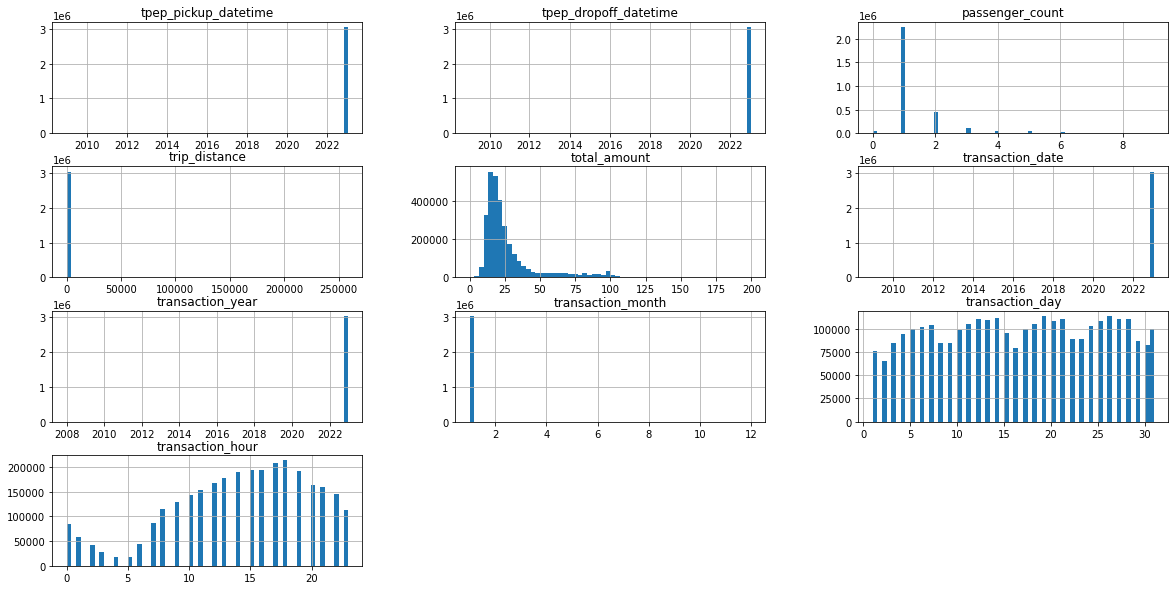

In [33]:
taxi_data_prepared.hist(figsize=(20,10),bins=60)

In [34]:
taxi_data_prepared=taxi_data_prepared[taxi_data_prepared['transaction_year']==2023]
taxi_data_prepared=taxi_data_prepared[taxi_data_prepared['transaction_month']==1]

In [35]:
taxi_data_prepared.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'payment_type', 'total_amount', 'transaction_date', 'transaction_year',
       'transaction_month', 'transaction_day', 'transaction_hour'],
      dtype='object')

In [36]:
categorical_columns=['PULocationID','transaction_date','transaction_month', 'transaction_day', 'transaction_hour']
numerical_columns=['trip_distance','total_amount']
all_needed_columns= categorical_columns + numerical_columns

In [37]:
main_taxi_df = taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(3039769, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,161,2023-01-01,1,1,0,0.97,14.30
1,43,2023-01-01,1,1,0,1.10,16.90
2,48,2023-01-01,1,1,0,2.51,34.90
3,138,2023-01-01,1,1,0,1.90,20.85
4,107,2023-01-01,1,1,0,1.43,19.68


In [38]:
taxi_grouped_by_region= main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transactions']=main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(71409, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2023-01-01,1,1,5,0.0,118.1100,1
1,1,2023-01-01,1,1,8,0.0,100.0000,1
2,1,2023-01-01,1,1,11,0.0,115.2000,1
3,1,2023-01-01,1,1,12,0.0,148.3150,2
4,1,2023-01-01,1,1,13,8.0,146.0475,4


# benchmark model 

In [39]:
data_benchmark_model= taxi_grouped_by_region.copy()
data_benchmark_model.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2023-01-01,1,1,5,0.0,118.1100,1
1,1,2023-01-01,1,1,8,0.0,100.0000,1
2,1,2023-01-01,1,1,11,0.0,115.2000,1
3,1,2023-01-01,1,1,12,0.0,148.3150,2
4,1,2023-01-01,1,1,13,8.0,146.0475,4


In [40]:
catig_feat_benchmark=['PULocationID','transaction_month', 'transaction_day', 'transaction_hour']
input_feat_benchmark= catig_feat_benchmark 
target_feat_benchmark='total_amount'

# train test split


In [41]:
from sklearn.model_selection import train_test_split

x_bench=data_benchmark_model[input_feat_benchmark]
y_bench=data_benchmark_model[target_feat_benchmark]

x_bench = pd.get_dummies(x_bench)

x_train_b,x_test_b,y_train_b,y_test_b=train_test_split(x_bench,y_bench,test_size=.3,random_state=12)

# fit_model 

In [42]:
from sklearn.tree import DecisionTreeRegressor
tree= DecisionTreeRegressor(max_depth=10)
tree.fit(x_train_b,y_train_b)

DecisionTreeRegressor(max_depth=10)

# model_evaluation 

In [43]:
y_pred_b=tree.predict(x_test_b)

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from math import sqrt

print('mean_absolute_error: ',mean_absolute_error(y_test_b,y_pred_b))
print('mean_squerd_error: ' ,mean_squared_error(y_test_b,y_pred_b))
print('root_mean_squerd_error: ' , sqrt(mean_squared_error(y_test_b,y_pred_b)))
print('r2: ' ,r2_score(y_test_b,y_pred_b))

mean_absolute_error:  11.722960303076228
mean_squerd_error:  311.62751659352523
root_mean_squerd_error:  17.65297472364149
r2:  0.27830056872007847


# feature_Engineering

In [45]:
data_with_new_feat = taxi_grouped_by_region.copy()
data_with_new_feat.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2023-01-01,1,1,5,0.0,118.1100,1
1,1,2023-01-01,1,1,8,0.0,100.0000,1
2,1,2023-01-01,1,1,11,0.0,115.2000,1
3,1,2023-01-01,1,1,12,0.0,148.3150,2
4,1,2023-01-01,1,1,13,8.0,146.0475,4


## related Data

In [46]:
data_with_new_feat['transaction_week_day']=data_with_new_feat['transaction_date'].dt.weekday
data_with_new_feat['is_weekend']=data_with_new_feat['transaction_week_day'].apply(lambda x: True if x == 5 or x == 6 else False)




In [47]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal=USFederalHolidayCalendar()
holidays= cal.holidays(start='2022',end='2024').date
data_with_new_feat['is_holiday']=data_with_new_feat['transaction_date'].isin(holidays)

data_with_new_feat.head()


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,is_weekend,is_holiday
0,1,2023-01-01,1,1,5,0.0,118.1100,1,6,True,False
1,1,2023-01-01,1,1,8,0.0,100.0000,1,6,True,False
2,1,2023-01-01,1,1,11,0.0,115.2000,1,6,True,False
3,1,2023-01-01,1,1,12,0.0,148.3150,2,6,True,False
4,1,2023-01-01,1,1,13,8.0,146.0475,4,6,True,False



# borough Related

In [48]:
zone_lookup= pd.read_csv('Data/taxi_zone_lookup.csv')
zone_lookup= zone_lookup[['LocationID','Borough']]
zone_lookup['LocationID']= zone_lookup['LocationID'].astype(str)
zone_lookup.head()


,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [49]:
data_with_new_feat = data_with_new_feat.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')
data_with_new_feat.drop('LocationID',axis=1,inplace=True)
data_with_new_feat.head()



,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,is_weekend,is_holiday,Borough
0,1,2023-01-01,1,1,5,0.0,118.1100,1,6,True,False,EWR
1,1,2023-01-01,1,1,8,0.0,100.0000,1,6,True,False,EWR
2,1,2023-01-01,1,1,11,0.0,115.2000,1,6,True,False,EWR
3,1,2023-01-01,1,1,12,0.0,148.3150,2,6,True,False,EWR
4,1,2023-01-01,1,1,13,8.0,146.0475,4,6,True,False,EWR


In [50]:
data_with_new_feat['Borough'].value_counts()

Manhattan        42234
Queens           13643
Brooklyn         10253
Bronx             3436
Unknown            738
Staten Island      320
EWR                221
Name: Borough, dtype: int64

## Weather related

In [51]:
nyc_weather= pd.read_csv('Data/nyc_weather.csv')
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,31.12.2019 22:00,6.1,65,6,100%.,0.3
1,31.12.2019 19:00,6.7,71,5,70 – 80%.,NaN
2,31.12.2019 16:00,7.2,66,5,50%.,NaN
3,31.12.2019 13:00,6.1,76,3,100%.,Trace of precipitation
4,31.12.2019 10:00,4.4,83,2,100%.,Trace of precipitation


In [52]:
nyc_weather.dtypes

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                 object
amount of precipitation     object
dtype: object

In [53]:
nyc_weather.shape

(2936, 6)

In [54]:
nyc_weather['cloud cover'].value_counts()

70 – 80%.                                                     973
100%.                                                         896
20–30%.                                                       479
50%.                                                          413
no clouds                                                     168
Sky obscured by fog and/or other meteorological phenomena.      3
Name: cloud cover, dtype: int64

In [55]:
nyc_weather['amount of precipitation'].value_counts()



Trace of precipitation    266
0.3                        61
2.0                        49
1.0                        45
0.5                        42
0.8                        42
4.0                        33
5.0                        24
3.0                        23
6.0                        19
7.0                        13
8.0                        13
9.0                        11
10.0                       10
13.0                        7
12.0                        7
15.0                        6
11.0                        5
16.0                        3
22.0                        2
14.0                        2
29.0                        2
63.0                        1
21.0                        1
68.0                        1
17.0                        1
20.0                        1
30.0                        1
35.0                        1
34.0                        1
24.0                        1
18.0                        1
25.0                        1
Name: amou

In [56]:
nyc_weather.isnull().sum()

date and time                 0
temperature                   0
humidity                      0
wind speed                    0
cloud cover                   4
amount of precipitation    2240
dtype: int64

In [57]:
nyc_weather['amount of precipitation']=nyc_weather['amount of precipitation'].replace('Trace of precipitation',0.1)
nyc_weather['amount of precipitation']=nyc_weather['amount of precipitation'].astype(float)

nyc_weather['amount of precipitation'].interpolate(inplace=True)



In [58]:
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('70 – 80%.', 0.7)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('100%.', 1)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('20–30%.', 0.3)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('50%.', 0.5)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('no clouds', 0)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('Sky obscured by fog and/or other meteorological phenomena.', 1)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].astype(float)
nyc_weather['cloud cover'].interpolate(inplace=True)

In [59]:
nyc_weather.dtypes

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                float64
amount of precipitation    float64
dtype: object

In [60]:
nyc_weather.loc[:,'date and time']= pd.to_datetime(nyc_weather.loc[:,'date and time'])
nyc_weather['hour'] = nyc_weather['date and time'].dt.hour
nyc_weather['month'] = nyc_weather['date and time'].dt.month
nyc_weather['day'] = nyc_weather['date and time'].dt.day

In [61]:
nyc_taxi_with_weather = data_with_new_feat.merge(nyc_weather, left_on = ['transaction_month','transaction_day','transaction_hour'],right_on= ['month','day','hour'],how='left')
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,is_weekend,...,Borough,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,1,2023-01-01,1,1,5,0.0,118.1100,1,6,True,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023-01-01,1,1,8,0.0,100.0000,1,6,True,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2023-01-01,1,1,11,0.0,115.2000,1,6,True,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2023-01-01,1,1,12,0.0,148.3150,2,6,True,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2023-01-01,1,1,13,8.0,146.0475,4,6,True,...,EWR,2019-01-01 13:00:00,12.2,51.0,9.0,0.7,0.446667,13.0,1.0,1.0


In [62]:
nyc_taxi_with_weather.drop(['date and time','hour','month','day'],axis=1,inplace=True)


In [63]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,is_weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,1,2023-01-01,1,1,5,0.0,118.1100,1,6,True,False,EWR,NaN,NaN,NaN,NaN,NaN
1,1,2023-01-01,1,1,8,0.0,100.0000,1,6,True,False,EWR,NaN,NaN,NaN,NaN,NaN
2,1,2023-01-01,1,1,11,0.0,115.2000,1,6,True,False,EWR,NaN,NaN,NaN,NaN,NaN
3,1,2023-01-01,1,1,12,0.0,148.3150,2,6,True,False,EWR,NaN,NaN,NaN,NaN,NaN
4,1,2023-01-01,1,1,13,8.0,146.0475,4,6,True,False,EWR,12.2,51.0,9.0,0.7,0.446667


In [64]:
nyc_taxi_with_weather.isnull().sum()

PULocationID                   0
transaction_date               0
transaction_month              0
transaction_day                0
transaction_hour               0
trip_distance                  0
total_amount                   0
count_of_transactions          0
transaction_week_day           0
is_weekend                     0
is_holiday                     0
Borough                      564
temperature                47476
humidity                   47476
wind speed                 47476
cloud cover                47476
amount of precipitation    47476
dtype: int64

In [65]:
nyc_taxi_with_weather.sort_values(['transaction_date','transaction_hour']).reset_index().drop('index',axis=1)

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,is_weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,100,2023-01-01,1,1,0,3.010000,33.730000,5,6,True,False,Manhattan,NaN,NaN,NaN,NaN,NaN
1,106,2023-01-01,1,1,0,8.280000,58.460000,1,6,True,False,Brooklyn,NaN,NaN,NaN,NaN,NaN
2,107,2023-01-01,1,1,0,2.518125,23.412443,176,6,True,False,Manhattan,NaN,NaN,NaN,NaN,NaN
3,112,2023-01-01,1,1,0,3.675000,25.130000,2,6,True,False,Brooklyn,NaN,NaN,NaN,NaN,NaN
4,113,2023-01-01,1,1,0,2.831552,27.140517,58,6,True,False,Manhattan,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71404,88,2023-01-31,1,31,23,5.095000,32.043333,6,1,False,False,Manhattan,NaN,NaN,NaN,NaN,NaN
71405,90,2023-01-31,1,31,23,3.687121,28.706667,66,1,False,False,Manhattan,NaN,NaN,NaN,NaN,NaN
71406,91,2023-01-31,1,31,23,6.020000,42.150000,1,1,False,False,Brooklyn,NaN,NaN,NaN,NaN,NaN
71407,93,2023-01-31,1,31,23,8.170000,96.660000,1,1,False,False,Queens,NaN,NaN,NaN,NaN,NaN


In [66]:
nyc_taxi_with_weather = nyc_taxi_with_weather.fillna(method='bfill')
nyc_taxi_with_weather.isna().sum()

PULocationID               0
transaction_date           0
transaction_month          0
transaction_day            0
transaction_hour           0
trip_distance              0
total_amount               0
count_of_transactions      0
transaction_week_day       0
is_weekend                 0
is_holiday                 0
Borough                    0
temperature                0
humidity                   0
wind speed                 0
cloud cover                0
amount of precipitation    0
dtype: int64

In [67]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,is_weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,1,2023-01-01,1,1,5,0.0,118.1100,1,6,True,False,EWR,12.2,51.0,9.0,0.7,0.446667
1,1,2023-01-01,1,1,8,0.0,100.0000,1,6,True,False,EWR,12.2,51.0,9.0,0.7,0.446667
2,1,2023-01-01,1,1,11,0.0,115.2000,1,6,True,False,EWR,12.2,51.0,9.0,0.7,0.446667
3,1,2023-01-01,1,1,12,0.0,148.3150,2,6,True,False,EWR,12.2,51.0,9.0,0.7,0.446667
4,1,2023-01-01,1,1,13,8.0,146.0475,4,6,True,False,EWR,12.2,51.0,9.0,0.7,0.446667


# Model Traning
### D.Tree

In [68]:
data_for_model= nyc_taxi_with_weather.copy()

In [69]:
categorical_feature = ['PULocationID','transaction_month','transaction_day','transaction_hour','transaction_week_day','is_weekend','is_holiday','Borough']
input_feature =  categorical_feature + ['temperature','humidity','wind speed','cloud cover','amount of precipitation']  
target_feature = 'total_amount'



In [70]:
from sklearn.model_selection import train_test_split

x= data_for_model[input_feature]
y= data_for_model[target_feature]

x=pd.get_dummies(x)

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.33,random_state=12)

In [71]:
from sklearn.tree import DecisionTreeRegressor

tree=DecisionTreeRegressor(max_depth=10)
tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [72]:
y_pred=tree.predict(x_test)

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from math import sqrt 

print('mean_abslout_error: ',mean_absolute_error(y_test,y_pred))
print('mean_squared_error: ',mean_squared_error(y_test,y_pred))
print('root_mean_squared_error: ',sqrt(mean_absolute_error(y_test,y_pred)))
print('r2: ',r2_score(y_test,y_pred))



mean_abslout_error:  10.080546069106267
mean_squared_error:  268.38512255931045
root_mean_squared_error:  3.174987569913663
r2:  0.38483376186477813


### Random_forest

In [73]:

from sklearn.ensemble import  RandomForestRegressor

random_model = RandomForestRegressor()
random_model.fit(x_train,y_train)

RandomForestRegressor()

In [74]:
y_pred=random_model.predict(x_test)

print('mean_abslout_error: ',mean_absolute_error(y_test,y_pred))
print('mean_squared_error: ',mean_squared_error(y_test,y_pred))
print('root_mean_squared_error: ',sqrt(mean_absolute_error(y_test,y_pred)))
print('r2: ',r2_score(y_test,y_pred))

mean_abslout_error:  9.08361189238069
mean_squared_error:  249.07628078673147
root_mean_squared_error:  3.0139030993681084
r2:  0.42909160836057514


### Gradient Boosting

In [75]:
from sklearn.ensemble import GradientBoostingRegressor

grad_model = GradientBoostingRegressor()
grad_model.fit(x_train,y_train)

GradientBoostingRegressor()

In [76]:
y_pred=grad_model.predict(x_test)

print('mean_abslout_error: ',mean_absolute_error(y_test,y_pred))
print('mean_squared_error: ',mean_squared_error(y_test,y_pred))
print('root_mean_squared_error: ',sqrt(mean_absolute_error(y_test,y_pred)))
print('r2: ',r2_score(y_test,y_pred))

mean_abslout_error:  10.022098385953
mean_squared_error:  243.44189478735433
root_mean_squared_error:  3.1657697935814917
r2:  0.44200619917837514


# Comparing the models 

# Tuning

In [84]:
from sklearn.model_selection import RandomizedSearchCV

params_grid={
    'n_estimators':[int(x)for x in np.linspace(start=200, stop=200, num=10) ],
    'max_features':['auto','sqrt'],
    'max_depth':[10,20,50,100,150,200,300,500],
    'bootstrap':[True, False]
}



rf= RandomForestRegressor()
 
rf_Random= RandomizedSearchCV(estimator=rf,param_distributions= params_grid,n_iter=10,cv=3,random_state=12,verbose=2,n_jobs=-1)

rf_Random.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 50, 100, 150, 200,
                                                      300, 500],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [200, 200, 200, 200,
                                                         200, 200, 200, 200,
                                                         200, 200]},
                   random_state=12, verbose=2)

[CV] END bootstrap=False, max_depth=20, max_features=sqrt, n_estimators=200; total time=  48.5s
[CV] END bootstrap=True, max_depth=150, max_features=auto, n_estimators=200; total time= 4.9min
[CV] END bootstrap=False, max_depth=500, max_features=auto, n_estimators=200; total time= 7.5min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=200; total time=  13.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=200; total time=  13.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=200; total time=  13.2s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, n_estimators=200; total time= 1.9min
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, n_estimators=200; total time=  48.8s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, n_estimators=200; total time= 1.3min
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, n_estimators=200; total time= 1.5min
[CV] END bootstrap=False, max_depth=50, m

In [86]:
performances = pd.DataFrame.from_dict(rf_Random.cv_results_)
performances

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,46.725333,0.195000,1.816631,0.023721,200,sqrt,20,False,"{'n_estimators': 200, 'max_features': 'sqrt', ...",0.405186,0.432181,0.415998,0.417788,0.011093,2
1,293.157320,7.214693,7.454006,2.045797,200,auto,150,True,"{'n_estimators': 200, 'max_features': 'auto', ...",0.411767,0.444281,0.431621,0.429223,0.013382,1
2,82.064449,4.426405,4.713713,0.566081,200,sqrt,50,False,"{'n_estimators': 200, 'max_features': 'sqrt', ...",0.379160,0.406780,0.386017,0.390652,0.011742,4
3,18.218375,1.991795,1.359723,0.091447,200,sqrt,10,False,"{'n_estimators': 200, 'max_features': 'sqrt', ...",0.330920,0.350833,0.341166,0.340973,0.008130,9
4,430.729355,22.793516,7.519110,0.528136,200,auto,500,False,"{'n_estimators': 200, 'max_features': 'auto', ...",0.064292,0.091439,0.095404,0.083712,0.013827,10
5,129.285973,1.694114,1.556375,0.063468,200,auto,10,False,"{'n_estimators': 200, 'max_features': 'auto', ...",0.353626,0.390091,0.363151,0.368956,0.015442,5
6,73.494959,1.981792,3.696918,0.017076,200,sqrt,50,False,"{'n_estimators': 200, 'max_features': 'sqrt', ...",0.380261,0.407357,0.386287,0.391302,0.011616,3
7,12.252673,0.255204,1.281325,0.013170,200,sqrt,10,True,"{'n_estimators': 200, 'max_features': 'sqrt', ...",0.326751,0.352966,0.348808,0.342842,0.011504,6
8,96.715415,0.551754,11.704865,3.248797,200,sqrt,100,False,"{'n_estimators': 200, 'max_features': 'sqrt', ...",0.331244,0.354422,0.337991,0.341219,0.009734,8
9,77.084208,18.307340,3.147673,1.252447,200,sqrt,100,False,"{'n_estimators': 200, 'max_features': 'sqrt', ...",0.335755,0.354191,0.336309,0.342085,0.008563,7


In [94]:
rf_Random.best_params_

{'n_estimators': 200,
 'max_features': 'auto',
 'max_depth': 150,
 'bootstrap': True}

In [96]:
best_model=RandomForestRegressor(n_estimators=200,max_features='auto',max_depth=150,bootstrap=True)
best_model.fit(x_train,y_train)


y_pred=best_model.predict(x_test)

print('mean_abslout_error: ',mean_absolute_error(y_test,y_pred))
print('mean_squared_error: ',mean_squared_error(y_test,y_pred))
print('root_mean_squared_error: ',sqrt(mean_absolute_error(y_test,y_pred)))
print('r2: ',r2_score(y_test,y_pred))

mean_abslout_error:  9.0753358870335
mean_squared_error:  248.7499413147997
root_mean_squared_error:  3.0125298151277273
r2:  0.42983961191378595
